**Name: BALA SUBRAMANYAM BATTULA**

**Student ID: 22075288**

In [ ]:
!pip install wbgapi

In [ ]:
#Using required packages
import pandas as pd
import wbgapi as wb
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
#Loading the climate dataset
dfrm=pd.read_csv(r"/content/Climatic_Economic_Data.csv", low_memory=False)

In [ ]:
#Seeing the loaded data
dfrm.head(6)

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.69999695,96.61613464,97.69999695,97.69999695,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.09197235,95.58617401,97.07563019,97.06671143,..
5,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,99.5,99.62602234,99.5,99.5,..


In [ ]:
#Seeing the actual data in transpose form
dfrm.T

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN
2018 [YR2018],30.9,13.85,81.6,96.61613464,95.58617401,99.62602234,..,79.8,62.5,92.2,...,85.67822849,89.56614135,83.20084408,97.42136036,..,NaN,NaN,NaN,NaN,NaN
2019 [YR2019],31.9,15.1,82.3,97.69999695,97.07563019,99.5,..,80.7,63.25,92.3,...,86.0916941,90.01130423,84.24698264,97.64521899,..,NaN,NaN,NaN,NaN,NaN
2020 [YR2020],33.2,15.9,82.6,97.69999695,97.06671143,99.5,..,81.3,64.6,92.9,...,86.47126752,90.52103753,82.65782634,97.26844525,..,NaN,NaN,NaN,NaN,NaN
2021 [YR2021],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Selecting the different nations,climatic and economic indicators
import warnings
with warnings.catch_warnings(record=True):
    econmc_fctrs = ['NY.GDP.MKTP.PP.CD','NE.IMP.GNFS.ZS']
    nations = ["AUS","JPN",'LUX','CHE','PAK','IND','CHL','CHN','JAM','BGR']
    climtc_fctrs=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.PC']
    dfrm_econmc  = wb.data.DataFrame(econmc_fctrs, nations, mrv=6)
    dfrm_climtc = wb.data.DataFrame(climtc_fctrs, nations, mrv=6)

#NY.GDP.MKTP.PP.CD: GDP on PPP of a country
#NE.IMP.GNFS.ZS: Total Import of a country
#EN.ATM.GHGT.KT.CE: Emission of Greenhouse gases in a country
#EN.ATM.CO2E.PC: Emissions of carbon dioxide in a country

In [ ]:
# Ecnminc Factors of a nation
dfrm_econmc.columns = [a.replace('YR','') for a in dfrm_econmc.columns]
dfrm_econmc=dfrm_econmc.stack().unstack(level=1)
dfrm_econmc.index.names = ['Nation_Name', 'Year']
dfrm_econmc.fillna(0)
dfrm_econmc.columns
dfrm_econmc.head(6)

series            NE.IMP.GNFS.ZS  NY.GDP.MKTP.PP.CD
Nation_Name Year                                   
AUS         2017       20.713684       1.190738e+12
            2018       21.493520       1.254437e+12
            2019       21.637175       1.317703e+12
            2020       20.175673       1.364962e+12
            2021       17.725541       1.443032e+12
            2022       19.709620       1.643970e+12

In [ ]:
# Climtic Indicator of a nation
dfrm_climtc.columns = [a.replace('YR','') for a in dfrm_climtc.columns]
dfrm_climtc=dfrm_climtc.stack().unstack(level=1)
dfrm_climtc.index.names = ['Nation_Name', 'Year']
dfrm_climtc.fillna(0)
dfrm_climtc.columns
dfrm_climtc.head(6)

series            EN.ATM.CO2E.PC  EN.ATM.GHGT.KT.CE
Nation_Name Year                                   
AUS         2015       16.198458        622092.6414
            2016       16.320331        600642.7642
            2017       16.149150        647518.2719
            2018       15.865714        642275.8577
            2019       15.599045        613604.7013
            2020       14.776137        571903.1199

In [ ]:
#Cleaning the two datasets
a=dfrm_econmc.reset_index()
b=dfrm_climtc.reset_index()
c=a.fillna(0)
d=b.fillna(0)

In [ ]:
#Forming the final dataframe
final_dfrm = pd.merge(c, d)
final_dfrm.head(6)

series,Nation_Name,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.PP.CD,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,AUS,2017,20.713684,1.190738e+12,16.149150,647518.27190
1,AUS,2018,21.493520,1.254437e+12,15.865714,642275.85770
2,AUS,2019,21.637175,1.317703e+12,15.599045,613604.70130
3,AUS,2020,20.175673,1.364962e+12,14.776137,571903.11990
4,BGR,2017,62.726443,1.518360e+11,6.202011,56596.72316
5,BGR,2018,63.192089,1.616186e+11,5.821777,53370.25718


In [ ]:
#Standardising the dataset values
f1 = final_dfrm.iloc[:,2:]
final_dfrm.iloc[:,2:] = (f1-f1.min())/ (f1.max() - f1.min())
final_dfrm.head(6)

series,Nation_Name,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.PP.CD,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,AUS,2017,0.117734,0.047958,1.000000,0.049483
1,AUS,2018,0.122166,0.050584,0.981522,0.049078
2,AUS,2019,0.122983,0.053193,0.964136,0.046861
3,AUS,2020,0.114676,0.055141,0.910488,0.043638
4,BGR,2017,0.356528,0.005129,0.351504,0.003801
5,BGR,2018,0.359175,0.005532,0.326715,0.003551


In [ ]:
#Clustering the data with K-means
final_clstr = final_dfrm.drop('Nation_Name', axis = 1)
kmns = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(final_clstr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


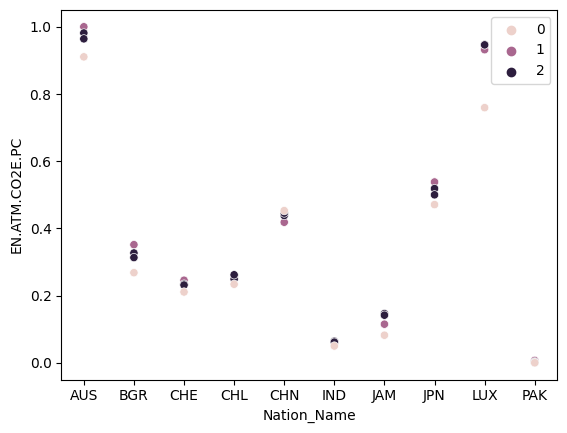

In [ ]:
#Clustering based on GDP, PPP of different nations
sns.scatterplot(data=final_dfrm, x="Nation_Name", y="NY.GDP.MKTP.PP.CD", hue=kmns.labels_)
plt.legend(loc='best')
plt.show()

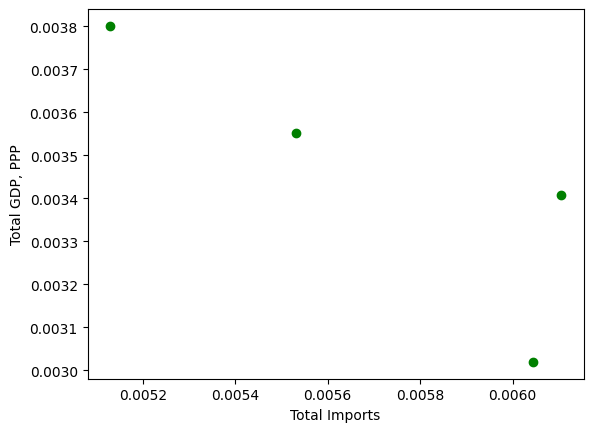

In [ ]:
#Scatter plot visualisation for Greenshouse gas of a nation vs GDP, PPP - Bulgaria
c1=final_dfrm[(final_dfrm['Nation_Name']=='BGR')]
c2 = c1.values
x, y = c2[:, 3], c2[:, 5]
plt.scatter(x, y,color="green")
plt.ylabel('Total GDP, PPP')
plt.xlabel('Total Imports')
plt.show()

Covariance equals:  [[ 1.51776086e+07 -5.57757396e+04  5.10538193e+01]
 [-5.57757396e+04  2.05037250e+02 -1.87742988e-01]
 [ 5.10538193e+01 -1.87742988e-01  1.71967921e-04]]
Params equals:  [-4.60894085e+03  1.67287663e+01 -1.49268099e-02]


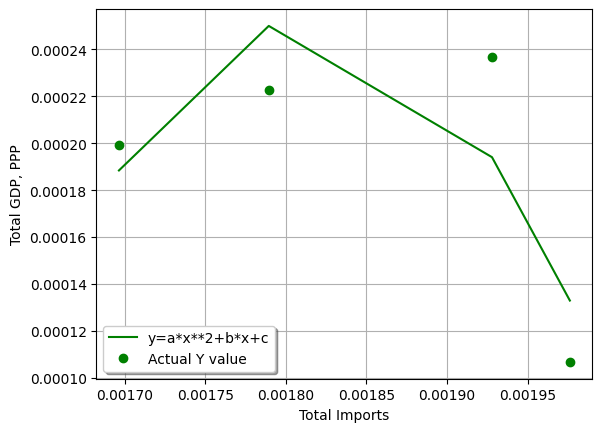

In [ ]:
#Leveraging the curve_fit function for Luxembourg- High GDP, PPP for relationship between Greenshouse gas of a nation vs GDP, PPP
a=final_dfrm[(final_dfrm['Nation_Name']=='LUX')]
b = a.values
x, y = b[:, 3], b[:, 5]
def fit_func(x, a, b, c):
    return a*x**2+b*x+c
params, covarnce = curve_fit(fit_func, x, y)
print("Covariance equals: ", covarnce)
print("Params equals: ", params)
params, _ = curve_fit(fit_func, x, y)
a, b, c = params[0], params[1], params[2]
yfit_val = a*x**2+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, yfit_val, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Total GDP, PPP')
    plt.xlabel('Total Imports')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show()

**For Luxembourg which is a country with High GDP,PPP , the Total Import is initially directly proportional to the GDP, PPP but after a certain value of total imports both of them exhibit an indirect relationship**

Covariance equals:  [[ 0.872707   -1.5857126   0.71597949]
 [-1.5857126   2.88336955 -1.30289034]
 [ 0.71597949 -1.30289034  0.5892044 ]]
Params equals:  [-0.83921308  1.90300069 -0.0664362 ]


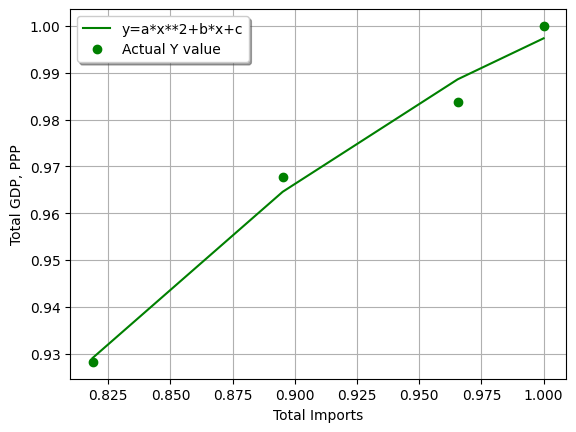

In [ ]:
#Leveraging the curve_fit function for China- Medium GDP, PPP for relationship between Greenshouse gas of a nation vs GDP, PPP
a=final_dfrm[(final_dfrm['Nation_Name']=='CHN')]
b = a.values
x, y = b[:, 3], b[:, 5]
def fit_func(x, a, b, c):
    return a*x**2+b*x+c
params, covarnce = curve_fit(fit_func, x, y)
print("Covariance equals: ", covarnce)
print("Params equals: ", params)
params, _ = curve_fit(fit_func, x, y)
a, b, c = params[0], params[1], params[2]
yfit_val = a*x**2+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, yfit_val, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Total GDP, PPP')
    plt.xlabel('Total Imports')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show()

**For China which is a country with Medium GDP,PPP , the Total Import is directly proportional to the GDP, PPP**

Covariance equals:  [[ 458.69118025 -334.59034424   60.84603829]
 [-334.59034424  244.19433652  -44.43145962]
 [  60.84603829  -44.43145962    8.0889277 ]]
Params equals:  [ 3.64219914 -2.48045428  0.67486014]


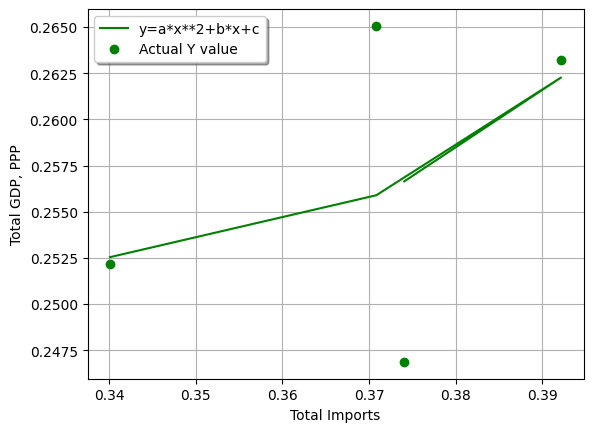

In [ ]:
#Leveraging the curve_fit function for India- Low GDP, PPP for relationship between Greenshouse gas of a nation vs GDP, PPP
a=final_dfrm[(final_dfrm['Nation_Name']=='IND')]
b = a.values
x, y = b[:, 3], b[:, 5]
def fit_func(x, a, b, c):
    return a*x**2+b*x+c
params, covarnce = curve_fit(fit_func, x, y)
print("Covariance equals: ", covarnce)
print("Params equals: ", params)
params, _ = curve_fit(fit_func, x, y)
a, b, c = params[0], params[1], params[2]
yfit_val = a*x**2+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, yfit_val, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Total GDP, PPP')
    plt.xlabel('Total Imports')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.show()

**For India which is a country with Low GDP,PPP , the Total Import is directly proportional to the GDP, PPP**

**We have used three countries with high, medium and low values of GDP, PPP and we have observed that for countries with high GDP, PPP, the relationship between the Total Import and the Total GDP,PPP is initially direct but after a certain value of total imports the relationship becomes indirect. For the country with medium and low GDP,PPP, the relationship between the Total Import and the Total GDP, PPP is direct.**

In [ ]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower

    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))

    pmix = list(iter.product(*uplow))

    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)

    return lower, upper